In [39]:
import pickle
import os
from hyperopt.plotting import *
from hyperopt import fmin, tpe, hp, STATUS_OK, STATUS_FAIL, Trials, base
import pandas as pd
import numpy as np
import time


from matplotlib import pyplot as plt
plt.rcParams.update(plt.rcParamsDefault)
%matplotlib inline




import matplotlib as mpl
import seaborn as sns



sns.set_color_codes()
sns.set_context("paper")
sns.set(rc={"font.size":18,"axes.labelsize":22})
sns.set(font_scale=1.7)
sns.set_style("white")
sns.despine()

/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)


<Figure size 432x288 with 0 Axes>

In [57]:
dataset_name = 'GermEval-2017'
#dataset_name = 'Organic-Coarse'

if dataset_name == 'GermEval-2017':
    ds_short = 'ge'
    path = os.path.join(os.getcwd(), 'logs', 'hp_run_GermEvalHyperoptRuns.pkl')
else:
    path = os.path.join(os.getcwd(), 'logs', 'hp_run_OrganicCoarseHyperopt.pkl')
    ds_short = 'og'

with open(path, 'rb') as f:
    trials = pickle.load(f)

# Convert to pandas

In [58]:
pd_dict_ens = {
    'hyperopt iteration': range(len(trials.results)),
    'status': trials.statuses(),
    'time': [r['eval_time'] for r in trials.results],
    'iterations': [r['eval_time'] if r['status'] == STATUS_OK else 0 for r in trials.results],
    'train loss': [r['results']['train']['loss'] if r['status'] == STATUS_OK else np.nan for r in trials.results],
    'train f1': [r['results']['train']['f1'] if r['status'] == STATUS_OK else 0 for r in trials.results],
    'validation f1': [r['results']['validation']['f1'] if r['status'] == STATUS_OK else 0 for r in trials.results],
    'validation loss': [r['results']['validation']['loss'] if r['status'] == STATUS_OK else np.nan for r in trials.results],
    'test f1': [r['results']['test']['f1'] if r['status'] == STATUS_OK else 0 for r in trials.results],
    'test loss': [r['results']['test']['loss'] if r['status'] == STATUS_OK else np.nan for r in trials.results]
}

In [59]:
df_ens = pd.DataFrame(pd_dict_ens)
df_ens

,hyperopt iteration,status,time,iterations,train loss,train f1,validation f1,validation loss,test f1,test loss
0,0,ok,1974.181045,1974.181045,0.214588,0.314600,0.323770,0.197266,0.286336,0.213818
1,1,ok,1935.397286,1935.397286,0.587789,0.377256,0.377432,0.583690,0.330922,0.592671
2,2,ok,2764.803079,2764.803079,0.112538,0.267117,0.249136,0.129504,0.212655,0.146711
3,3,ok,2611.593660,2611.593660,0.198166,0.246839,0.241784,0.197494,0.218425,0.201316
4,4,ok,1692.865100,1692.865100,2.644062,0.377302,0.382055,1.519115,0.319838,3.124750
5,5,fail,15.958375,0.000000,NaN,0.000000,0.000000,NaN,0.000000,NaN
6,6,ok,427.220645,427.220645,0.199593,0.371445,0.372308,0.186750,0.314898,0.187639
7,7,ok,1529.108093,1529.108093,0.195286,0.270401,0.276688,0.181278,0.242629,0.183461
8,8,ok,413.036618,413.036618,0.229184,0.290891,0.292419,0.204257,0.258432,0.211880
9,9,ok,1284.090815,1284.090815,0.134985,0.347384,0.343919,0.151344,0.305556,0.167207


In [60]:
pd_dict_sing = {
    'hyperopt iteration': [],
    'status': [],
    'split': [],
    'loss': [],
    'f1': [],
    'time': []
}
for i, r in enumerate(trials.results):
    for s in ['train', 'validation', 'test']:
        pd_dict_sing['time'].append(r['eval_time'])
        pd_dict_sing['hyperopt iteration'].append(i)
        pd_dict_sing['status'].append(r['status'])
        pd_dict_sing['split'].append(s)
        if r['status'] == STATUS_OK:
            pd_dict_sing['loss'].append(r['results'][s]['loss'])
            pd_dict_sing['f1'].append(r['results'][s]['f1'])
        else:
            pd_dict_sing['loss'].append(np.nan)
            pd_dict_sing['f1'].append(np.nan)
df_sing = pd.DataFrame(pd_dict_sing)
df_sing

,hyperopt iteration,status,split,loss,f1,time
0,0,ok,train,0.214588,0.314600,1974.181045
1,0,ok,validation,0.197266,0.323770,1974.181045
2,0,ok,test,0.213818,0.286336,1974.181045
3,1,ok,train,0.587789,0.377256,1935.397286
4,1,ok,validation,0.583690,0.377432,1935.397286
5,1,ok,test,0.592671,0.330922,1935.397286
6,2,ok,train,0.112538,0.267117,2764.803079
7,2,ok,validation,0.129504,0.249136,2764.803079
8,2,ok,test,0.146711,0.212655,2764.803079
9,3,ok,train,0.198166,0.246839,2611.593660


In [61]:
fig_save_path = os.path.join(os.getcwd(), 'Thesis', 'figures', '06_results')
df_filter = (df_sing['split'] == 'test')|(df_sing['split'] == 'validation')
df_random_filter = df_sing['hyperopt iteration'] > 9

# Losses over time

<Figure size 1440x720 with 0 Axes>

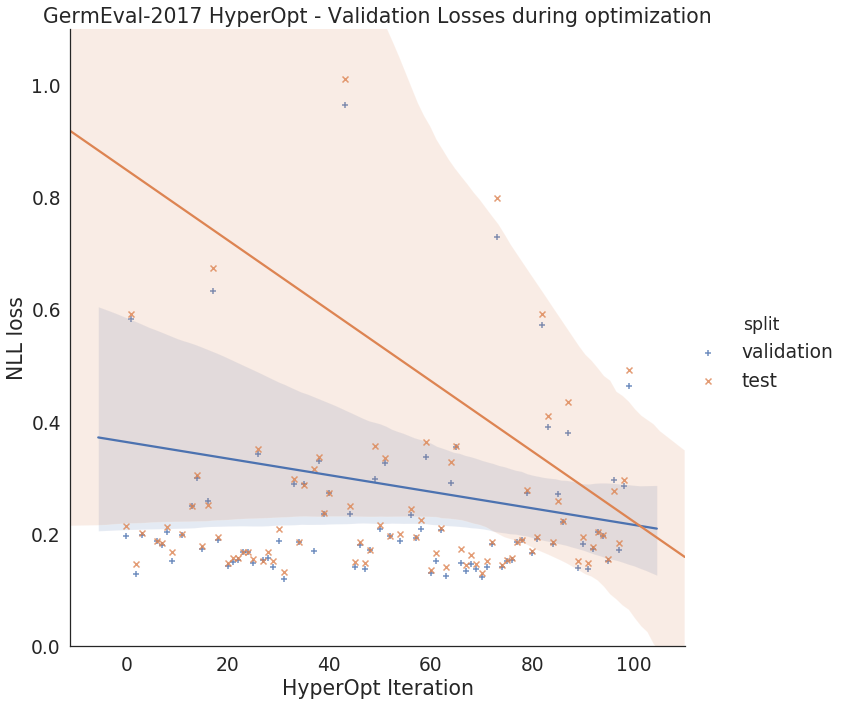

In [62]:
fn = os.path.join(fig_save_path, f'06_hp_{ds_short}_lm_loss-iteration.pdf')
plt.figure(figsize=(20,10))

sns.lmplot(x='hyperopt iteration', y='loss', height=10, aspect=1, hue='split', markers=['+', 'x'], data=df_sing[df_filter])
axes = plt.gca()
axes.set_ylim([0,1.1])
plt.title(f'{dataset_name} HyperOpt - Validation Losses during optimization')

plt.ylabel('NLL loss')
plt.xlabel('HyperOpt Iteration')

plt.savefig(fn)

<Figure size 1440x720 with 0 Axes>

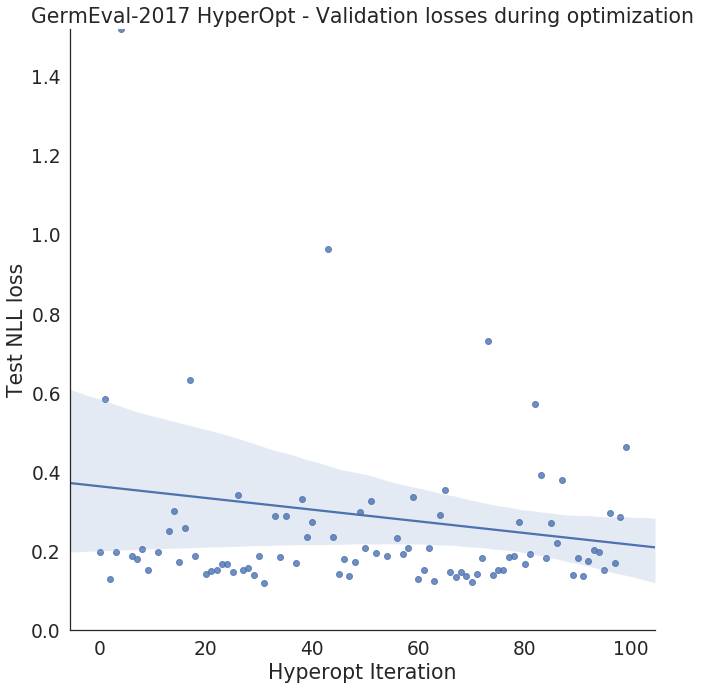

In [63]:
fn = os.path.join(fig_save_path, f'06_hp_{ds_short}_lm_loss-iteration_validation.pdf')
plt.figure(figsize=(20,10))
sns.lmplot(x='hyperopt iteration', y='validation loss', height=10, aspect=1, data=df_ens)
plt.title(f'{dataset_name} HyperOpt - Validation losses during optimization')
axes = plt.gca()
axes.set_ylim([0,1.52])
plt.ylabel('Test NLL loss')
plt.xlabel('Hyperopt Iteration')

plt.tight_layout()
plt.savefig(fn)

<Figure size 1440x720 with 0 Axes>

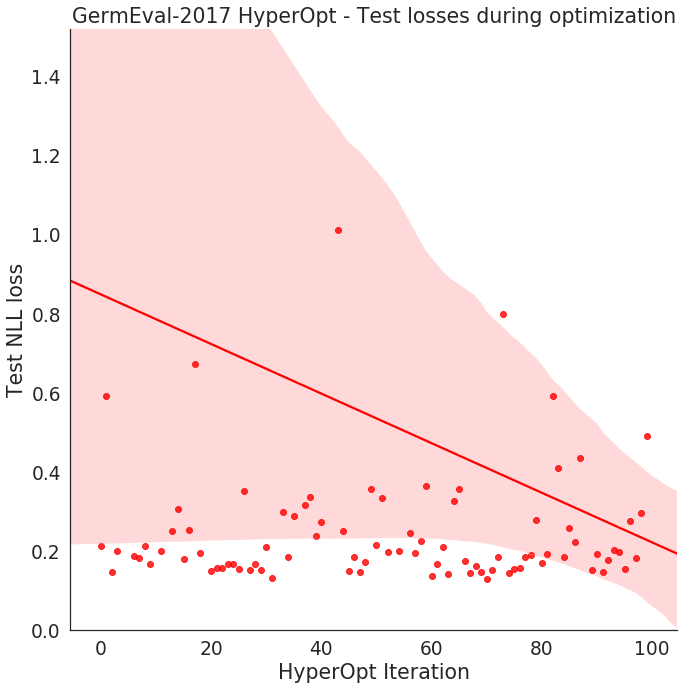

In [64]:
fn = os.path.join(fig_save_path, f'06_hp_{ds_short}_lm_loss-iteration_test.pdf')
plt.figure(figsize=(20,10))
sns.lmplot(x='hyperopt iteration', y='test loss', height=10, aspect=1, data=df_ens, scatter_kws={'color': 'red'}, line_kws={'color': 'red'})
plt.title(f'{dataset_name} HyperOpt - Test losses during optimization')
axes = plt.gca()
axes.set_ylim([0,1.52])
plt.ylabel('Test NLL loss')
plt.xlabel('HyperOpt Iteration')

plt.tight_layout()
plt.savefig(fn)

### Significance test

In [65]:
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats





#### Validation Loss Significance

In [66]:
y = [r['results']['validation']['loss'] for r in trials.results if r['status'] == STATUS_OK]
X = range(len(y))
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.8307
Date:                 Mi, 24 Apr 2019   Prob (F-statistic):              0.365
Time:                        18:20:37   Log-Likelihood:                -51.223
No. Observations:                  90   AIC:                             106.4
Df Residuals:                      88   BIC:                             111.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3598      0.090      3.980      0.0

In [67]:
print(est2.summary().as_latex())

\begin{center}
\begin{tabular}{lclc}
\toprule
\textbf{Dep. Variable:}    &        y        & \textbf{  R-squared:         } &     0.009   \\
\textbf{Model:}            &       OLS       & \textbf{  Adj. R-squared:    } &    -0.002   \\
\textbf{Method:}           &  Least Squares  & \textbf{  F-statistic:       } &    0.8307   \\
\textbf{Date:}             & Mi, 24 Apr 2019 & \textbf{  Prob (F-statistic):} &    0.365    \\
\textbf{Time:}             &     18:20:38    & \textbf{  Log-Likelihood:    } &   -51.223   \\
\textbf{No. Observations:} &          90     & \textbf{  AIC:               } &     106.4   \\
\textbf{Df Residuals:}     &          88     & \textbf{  BIC:               } &     111.4   \\
\textbf{Df Model:}         &           1     & \textbf{                     } &             \\
\bottomrule
\end{tabular}
\begin{tabular}{lcccccc}
               & \textbf{coef} & \textbf{std err} & \textbf{t} & \textbf{P$>$$|$t$|$} & \textbf{[0.025} & \textbf{0.975]}  \\
\midrule
\textbf{

#### Test Loss Significance

In [14]:
y = [r['results']['test']['loss'] for r in trials.results if r['status'] == STATUS_OK]
X = range(len(y))
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                    0.4930
Date:                 Mi, 24 Apr 2019   Prob (F-statistic):              0.484
Time:                        16:22:12   Log-Likelihood:                -206.16
No. Observations:                  90   AIC:                             416.3
Df Residuals:                      88   BIC:                             421.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8356      0.506      1.653      0.1

In [15]:
print(est2.summary().as_latex())

\begin{center}
\begin{tabular}{lclc}
\toprule
\textbf{Dep. Variable:}    &        y        & \textbf{  R-squared:         } &     0.006   \\
\textbf{Model:}            &       OLS       & \textbf{  Adj. R-squared:    } &    -0.006   \\
\textbf{Method:}           &  Least Squares  & \textbf{  F-statistic:       } &    0.4930   \\
\textbf{Date:}             & Mi, 24 Apr 2019 & \textbf{  Prob (F-statistic):} &    0.484    \\
\textbf{Time:}             &     16:22:21    & \textbf{  Log-Likelihood:    } &   -206.16   \\
\textbf{No. Observations:} &          90     & \textbf{  AIC:               } &     416.3   \\
\textbf{Df Residuals:}     &          88     & \textbf{  BIC:               } &     421.3   \\
\textbf{Df Model:}         &           1     & \textbf{                     } &             \\
\bottomrule
\end{tabular}
\begin{tabular}{lcccccc}
               & \textbf{coef} & \textbf{std err} & \textbf{t} & \textbf{P$>$$|$t$|$} & \textbf{[0.025} & \textbf{0.975]}  \\
\midrule
\textbf{

#### OLS for test F1 improvement

In [70]:
y = [r['results']['test']['f1'] for r in trials.results[10:] if r['status'] == STATUS_OK]
X = range(len(y))
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.9215
Date:                 Mi, 24 Apr 2019   Prob (F-statistic):              0.340
Time:                        18:29:12   Log-Likelihood:                 109.77
No. Observations:                  81   AIC:                            -215.5
Df Residuals:                      79   BIC:                            -210.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2611      0.014     18.766      0.0

## F1 Score over time

<Figure size 1440x864 with 0 Axes>

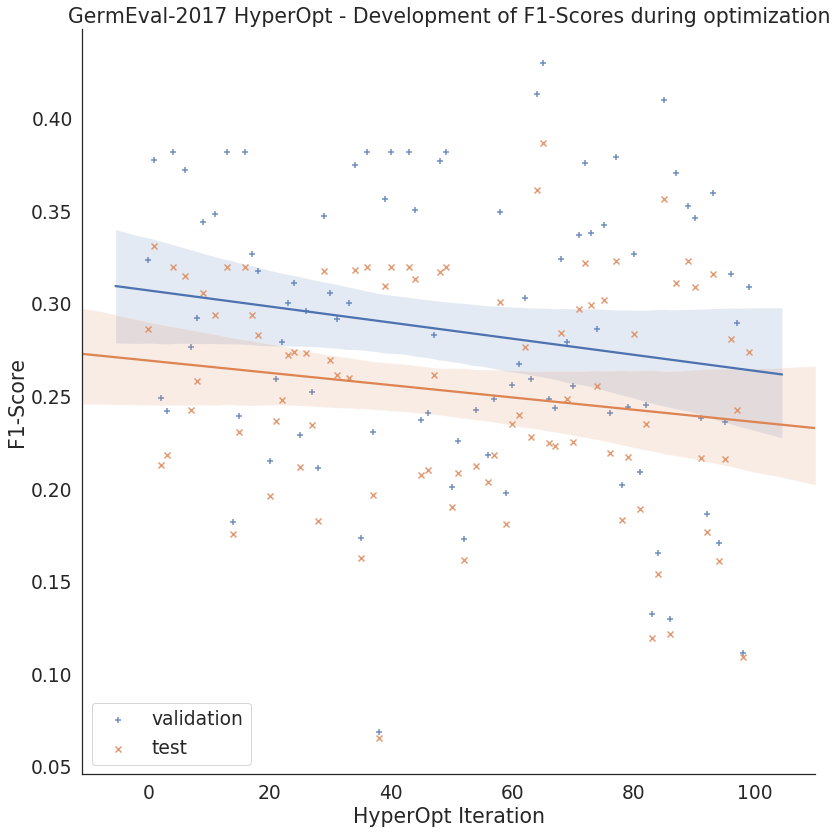

In [68]:
fn = os.path.join(fig_save_path, f'06_hp_{ds_short}_lm_f1time.pdf')
plt.figure(figsize=(20,12))


sns.lmplot(x='hyperopt iteration', y='f1', height=12, aspect=1, hue='split', markers=['+', 'x'], data=df_sing[df_filter], legend=False)
axes = plt.gca()
plt.title(f'{dataset_name} HyperOpt - Development of F1-Scores during optimization')
plt.legend(loc='lower left')


plt.ylabel('F1-Score')
plt.xlabel('HyperOpt Iteration')
plt.tight_layout()
plt.savefig(fn)

## How well does the loss correspond to the f1 score

<Figure size 1440x720 with 0 Axes>

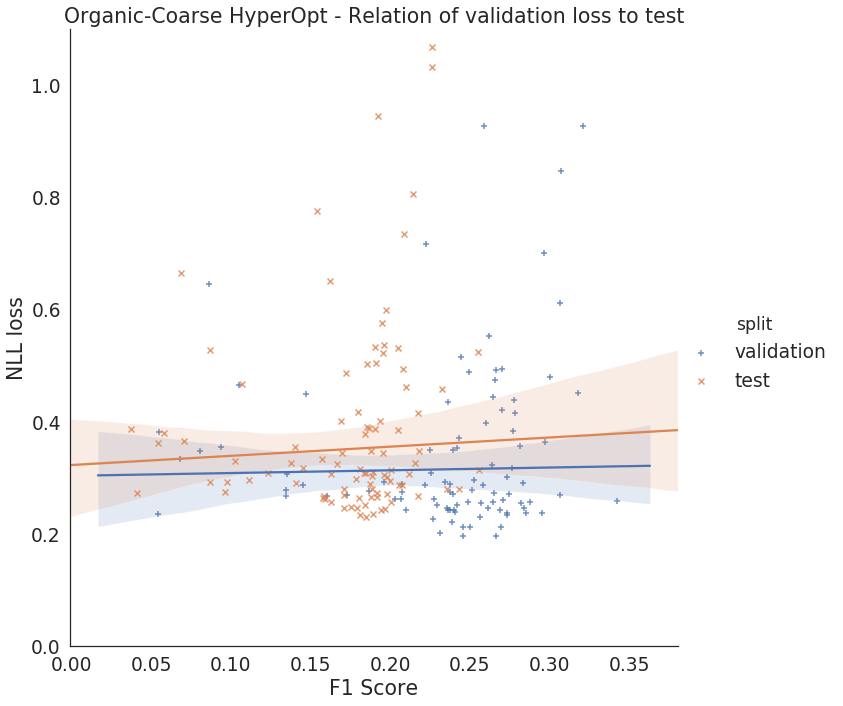

In [56]:

fn = os.path.join(fig_save_path, f'06_hp_{ds_short}_lm_loss-f1.pdf')
plt.figure(figsize=(20,10))

sns.lmplot(x='f1', y='loss', height=10, aspect=1, hue='split', markers=['+', 'x'], data=df_sing[df_filter], robust=True)
axes = plt.gca()
axes.set_ylim([0,1.1])
plt.title(f'{dataset_name} HyperOpt - Relation of validation loss to test')


plt.ylabel('NLL loss')
plt.xlabel('F1 Score')


plt.savefig(fn)

<Figure size 1440x720 with 0 Axes>

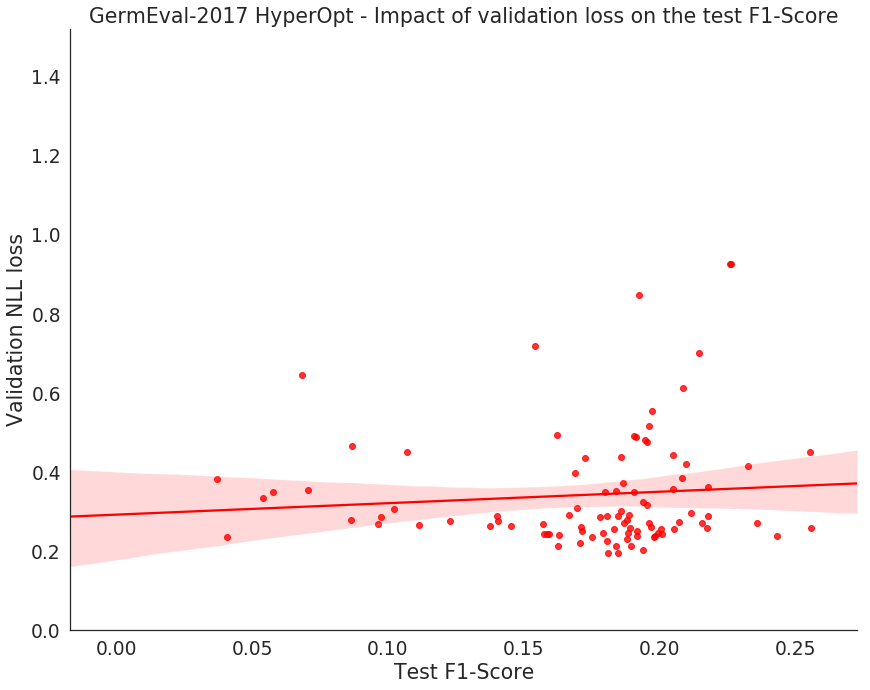

In [52]:
fn = os.path.join(fig_save_path, f'06_hp_{ds_short}_lm_lossf1_test.pdf')
plt.figure(figsize=(20,10))
sns.lmplot(x='test f1', y='validation loss', height=10, aspect=1.25, data=df_ens, scatter_kws={'color': 'red'}, line_kws={'color': 'red'})
plt.title('GermEval-2017 HyperOpt - Impact of validation loss on the test F1-Score')
axes = plt.gca()
axes.set_ylim([0,1.52])
plt.ylabel('Validation NLL loss')
plt.xlabel('Test F1-Score')


plt.tight_layout()
plt.savefig(fn)

## Time and F1 Score

<Figure size 1440x720 with 0 Axes>

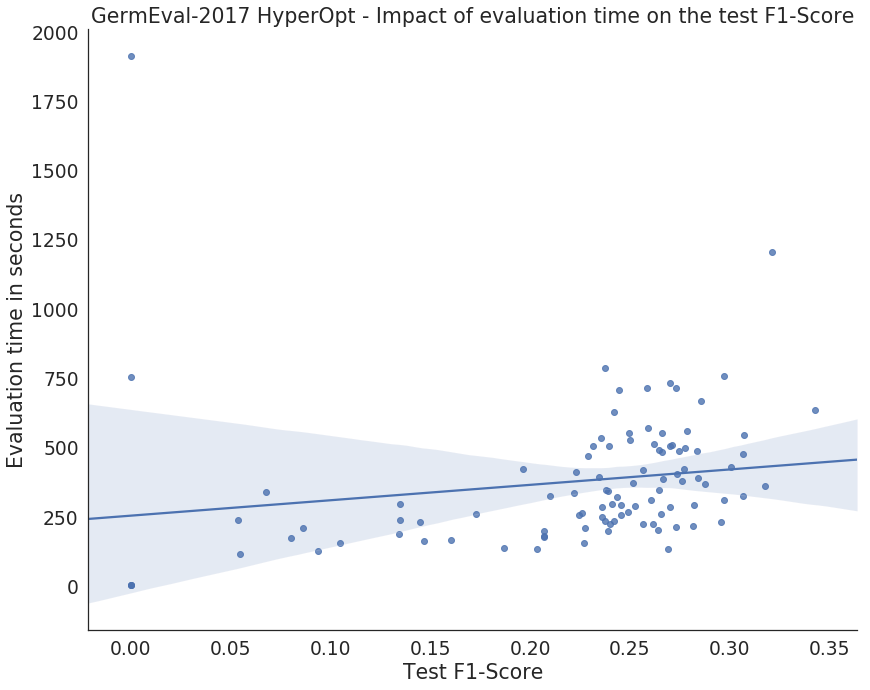

In [54]:
fn = os.path.join(fig_save_path, f'06_hp_{ds_short}_lm_timef1_test.pdf')
plt.figure(figsize=(20,10))
sns.lmplot(x='validation f1', y='time', height=10, aspect=1.25, data=df_ens)
plt.title('GermEval-2017 HyperOpt - Impact of evaluation time on the test F1-Score')
axes = plt.gca()
plt.ylabel('Evaluation time in seconds')
plt.xlabel('Test F1-Score')


plt.tight_layout()
plt.savefig(fn)